In [1]:
# Classification Problems: chapter 3
import os
import tarfile
import urllib.request
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
type(mnist)


sklearn.utils.Bunch

In [63]:
X, y= mnist["data"], mnist["target"]

In [7]:
X.shape
# each pixel contains 28x28 pixels which is 784 data array, in total there are 70,000 images

(70000, 784)

In [64]:
y.shape
y[1]

(70000,)

'0'

(-0.5, 27.5, 27.5, -0.5)

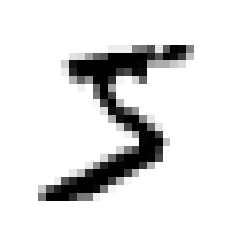

In [65]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[:1]
some_digit=some_digit.to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
# save_fig("some_digit_plot")
plt.show()

In [14]:
# X

pandas.core.frame.DataFrame

(-0.5, 27.5, 27.5, -0.5)

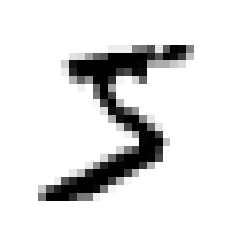

In [166]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[:1]
# some_digit_image =some_digit.reshape(28,28)
type(some_digit)
some_digit_numpy=some_digit.to_numpy()
some_digit_image =some_digit_numpy.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
# Numpy array is needed for the image plot whereas for the prediction the panda data frame works
# not numpy array

In [98]:
y[0]
# converting to integer
y=y.astype(np.uint8)
y.shape

5

(70000,)

In [167]:
X_train, X_test, y_train, y_test= X[:60000], X[60000:],y[:60000],y[60000:]

In [80]:
# X_train=X_train.to_numpy()
# X_test=X_test.to_numpy()
# y_train=y_train.to_numpy()
# y_test=y_test.to_numpy()

In [104]:
# type(X_train)
# type(y_train)
# # X_train[1]
# y_train

In [53]:
# X_train.shape
# nsamples, nx, ny =X_train.shape
# d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [168]:
y_train_5 = (y_train == 5) #Binary classifer which is true for all fives and not otherwise
y_train_5
y_test_5 = (y_test ==5)
y_test_5
# this is looking at data in the training set which is ==5 set as 1 and others 0

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

In [56]:
# Stochastic gradient classifier
# functions well as it can handle large datasets efficiently

In [169]:
# Creation of SGD classifier and training entire dataset on it
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42,shuffle=True)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [107]:
# some_digit.shape
# type(some_digit)
# y_test.shape
# y_train.shape
# X_train.shape
# X_test.shape
# y_test.reshape()

In [170]:
# sgd_clf.predict([some_digit])
sgd_clf.predict( X[:1])
# CLassifier set to stochastic would mean results are not reproducible

array([ True])

In [171]:
# Cross- validating samples 
# Stratified sampling means the sample chosen represents an accurate ratio of each class/male-female ratios
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)#Since the split is mentioned as 3,
#we get 3 values in the end

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf=clone(sgd_clf) # first we clone the classifier svd
    X_train_folds=X_train.loc[train_index] # then we copy the X_train/pandas data frame needs loc
    y_train_folds=y_train_5[train_index] # then we copy the y_train
    X_test_fold= X_train.loc[test_index] # then we copy the X_test/pandas data frame needs loc
    y_test_fold=y_train_5[test_index] # then we copy the y_test
    
    clone_clf.fit(X_train_folds, y_train_folds) #We build a copy of the training model
    y_pred = clone_clf.predict(X_test_fold) 
    n_correct=sum(y_pred==y_test_fold) #Evaluating the sum of the correct y_predicted
    print(n_correct/len(y_pred)) #Taking the ratio of the correct by the length of y_pred
    
    

SGDClassifier(random_state=42)

0.9669


SGDClassifier(random_state=42)

0.91625


SGDClassifier(random_state=42)

0.96785


In [128]:
# X_train_folds
# y_train_folds
# type(X_train_folds)
# type(y_train_folds)
# The type of dataset does not make any difference/ it can be both series as well as pandas

In [172]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring ="accuracy")
# Evaluating the model using cross validation with three folds/K-fold cross-validation
# Splitting training set into 3 folds: cv=3
# Non stratified sampling

array([0.95035, 0.96035, 0.9604 ])

In [173]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [174]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# this value is providing us with the accuracy of the model
#How is this never 5? Task for later

array([0.91125, 0.90855, 0.90915])

In [151]:
from sklearn.model_selection import cross_val_predict
sgd_clf2 = SGDClassifier(max_iter=1500, tol=1e-5, random_state=44,shuffle=True)
#this is the state of SGD classifier/ manipulating the values of max_iter, tol and ran_state provides 
# with different set of confusion matrix plots
y_train_pred = cross_val_predict(sgd_clf2, X_train, y_train_5, cv=3)
#cross val predict is similar to cross_cal_score
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
con_matrix=confusion_matrix(y_train_5, y_train_pred)

# First row-non 5's ( correctly classified,wrongly classified)
# Second row images of 5's(wrongly classified, correctly classified)
# all the 3 datasets are split in an manner so that, there is no overlapp of the data

array([[53570,  1009],
       [ 1301,  4120]], dtype=int64)

In [148]:
y_train_pred
y_train_pred.shape

array([ True, False, False, ...,  True, False, False])

(60000,)

In [163]:
4120/(4120+1009)
4120/(4120+1301)

0.8032754922986937

0.7600073787124146

In [149]:
# Precision and recall
# Precision= TP/(TP+FP)=4/(2+4)
# Recall = TP/(TP+FN)=4/(3+4)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)
x1=(con_matrix[0]+con_matrix[0])

0.8032754922986937

0.7600073787124146

In [164]:
# F1 score is an important evaluation parameter
#High F1 values are obtained only when both the recal and precision are high
# Precision-recall tradeoff's
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7810426540284361

In [207]:
#cannot access the threshold to classify, however one can access decision scores used in classification
y_scores=sgd_clf.decision_function(X[:20])
# Replacing somedigit by X[:1]
y_scores # predicting scores
threshold = 0
y_some_digit_pred = (y_scores> threshold)
y_some_digit_pred

array([  2164.22030239,  -5897.37359354, -13489.14805779,  -4623.84515943,
        -6873.05248453,  -3908.27576291,  -4851.9422397 ,  -4988.52407755,
        -2226.78132866,  -4081.33692831,  -5711.47789687,   4742.52813158,
       -10322.61970087,  -5028.5080424 ,  -2774.48933701,  -4757.62175338,
        -7995.78737908,  -5478.98084419,  -2494.25572149,  -8689.98448487])

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

#the limiting factor or value for true is 2164, 4742,
#both >1

In [205]:
y_pred_score=sgd_clf.predict(X[:20])
y_pred_score
# y_pred_score
# del y_pred_score, y_scores
# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42,shuffle=True)
# Reminder of classifier

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [215]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [225]:
# Trying to create a large number of subsets of those images
# first_20 = X[:20]
# for i<20
#     i
# first_20=first_20.to_numpy()
# for 
# first_20 = first_20.reshape(28, 28)
# plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")
# # save_fig("some_digit_plot")
# plt.show()

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method ="decision_function")
# y_train_pred = cross_val_predict(sgd_clf2, X_train, y_train_5, cv=3)
# cross_val_pred has been used earlier. However, this time we pass another argument-"decision_function"


In [ ]:
y_scores.size